# Day2. 예측(회귀, 의사결정나무, 앙상블)

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_raw = pd.read_csv('titanic.csv', encoding = 'cp949')

# 한글출력
import matplotlib
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font',family = font_name)

In [4]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse


In [5]:
df_raw = pd.read_csv('부품수리시간.csv', encoding = 'cp949')

In [6]:
df_raw

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


In [7]:
df_raw.describe()

,UNITS,MINUTES
count,14.000000,14.000000
mean,6.000000,97.214286
std,2.961289,46.217177
min,1.000000,23.000000
25%,4.000000,66.500000
50%,6.000000,96.500000
75%,8.750000,138.500000
max,10.000000,166.000000


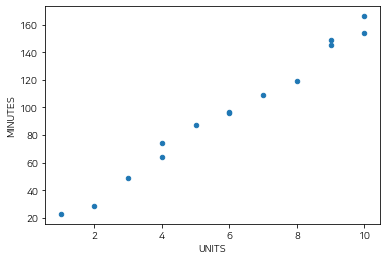

In [8]:
df_raw.plot.scatter(x = "UNITS", y = "MINUTES")

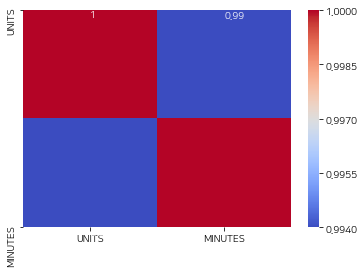

In [18]:
# annotation 위치 지정 -> 잘 안되네
annot_kws = {"ha": 'left',"va": 'top'}

# annotation 상관계수 출력하는 히트맵
sns.heatmap(df_raw.corr(method = "pearson").round(3), annot = True, cmap = 'coolwarm', annot_kws=annot_kws)

In [20]:
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           8.92e-13
Time:                        13:15:39   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


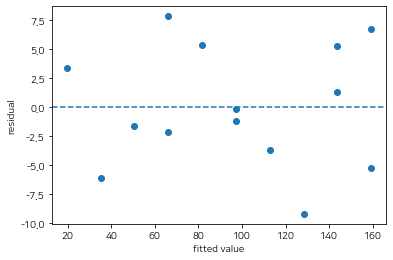

In [21]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

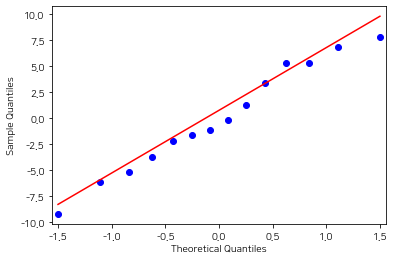

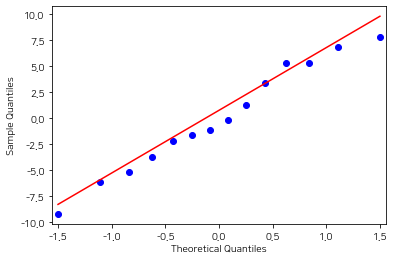

In [22]:
qqplot(reg_result.resid, line = "q")

In [25]:
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis = 0)

NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [29]:
df_raw = pd.read_csv('체질검사.csv', encoding = 'cp949')
df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0


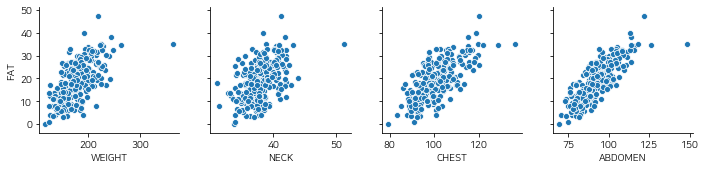

In [30]:
sns.pairplot(df_raw, y_vars = "FAT", x_vars = ['WEIGHT','NECK','CHEST','ABDOMEN'])


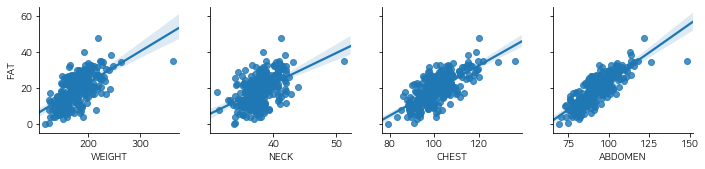

In [31]:
sns.pairplot(df_raw, y_vars = "FAT", x_vars = ['WEIGHT','NECK','CHEST','ABDOMEN'], kind = "reg")

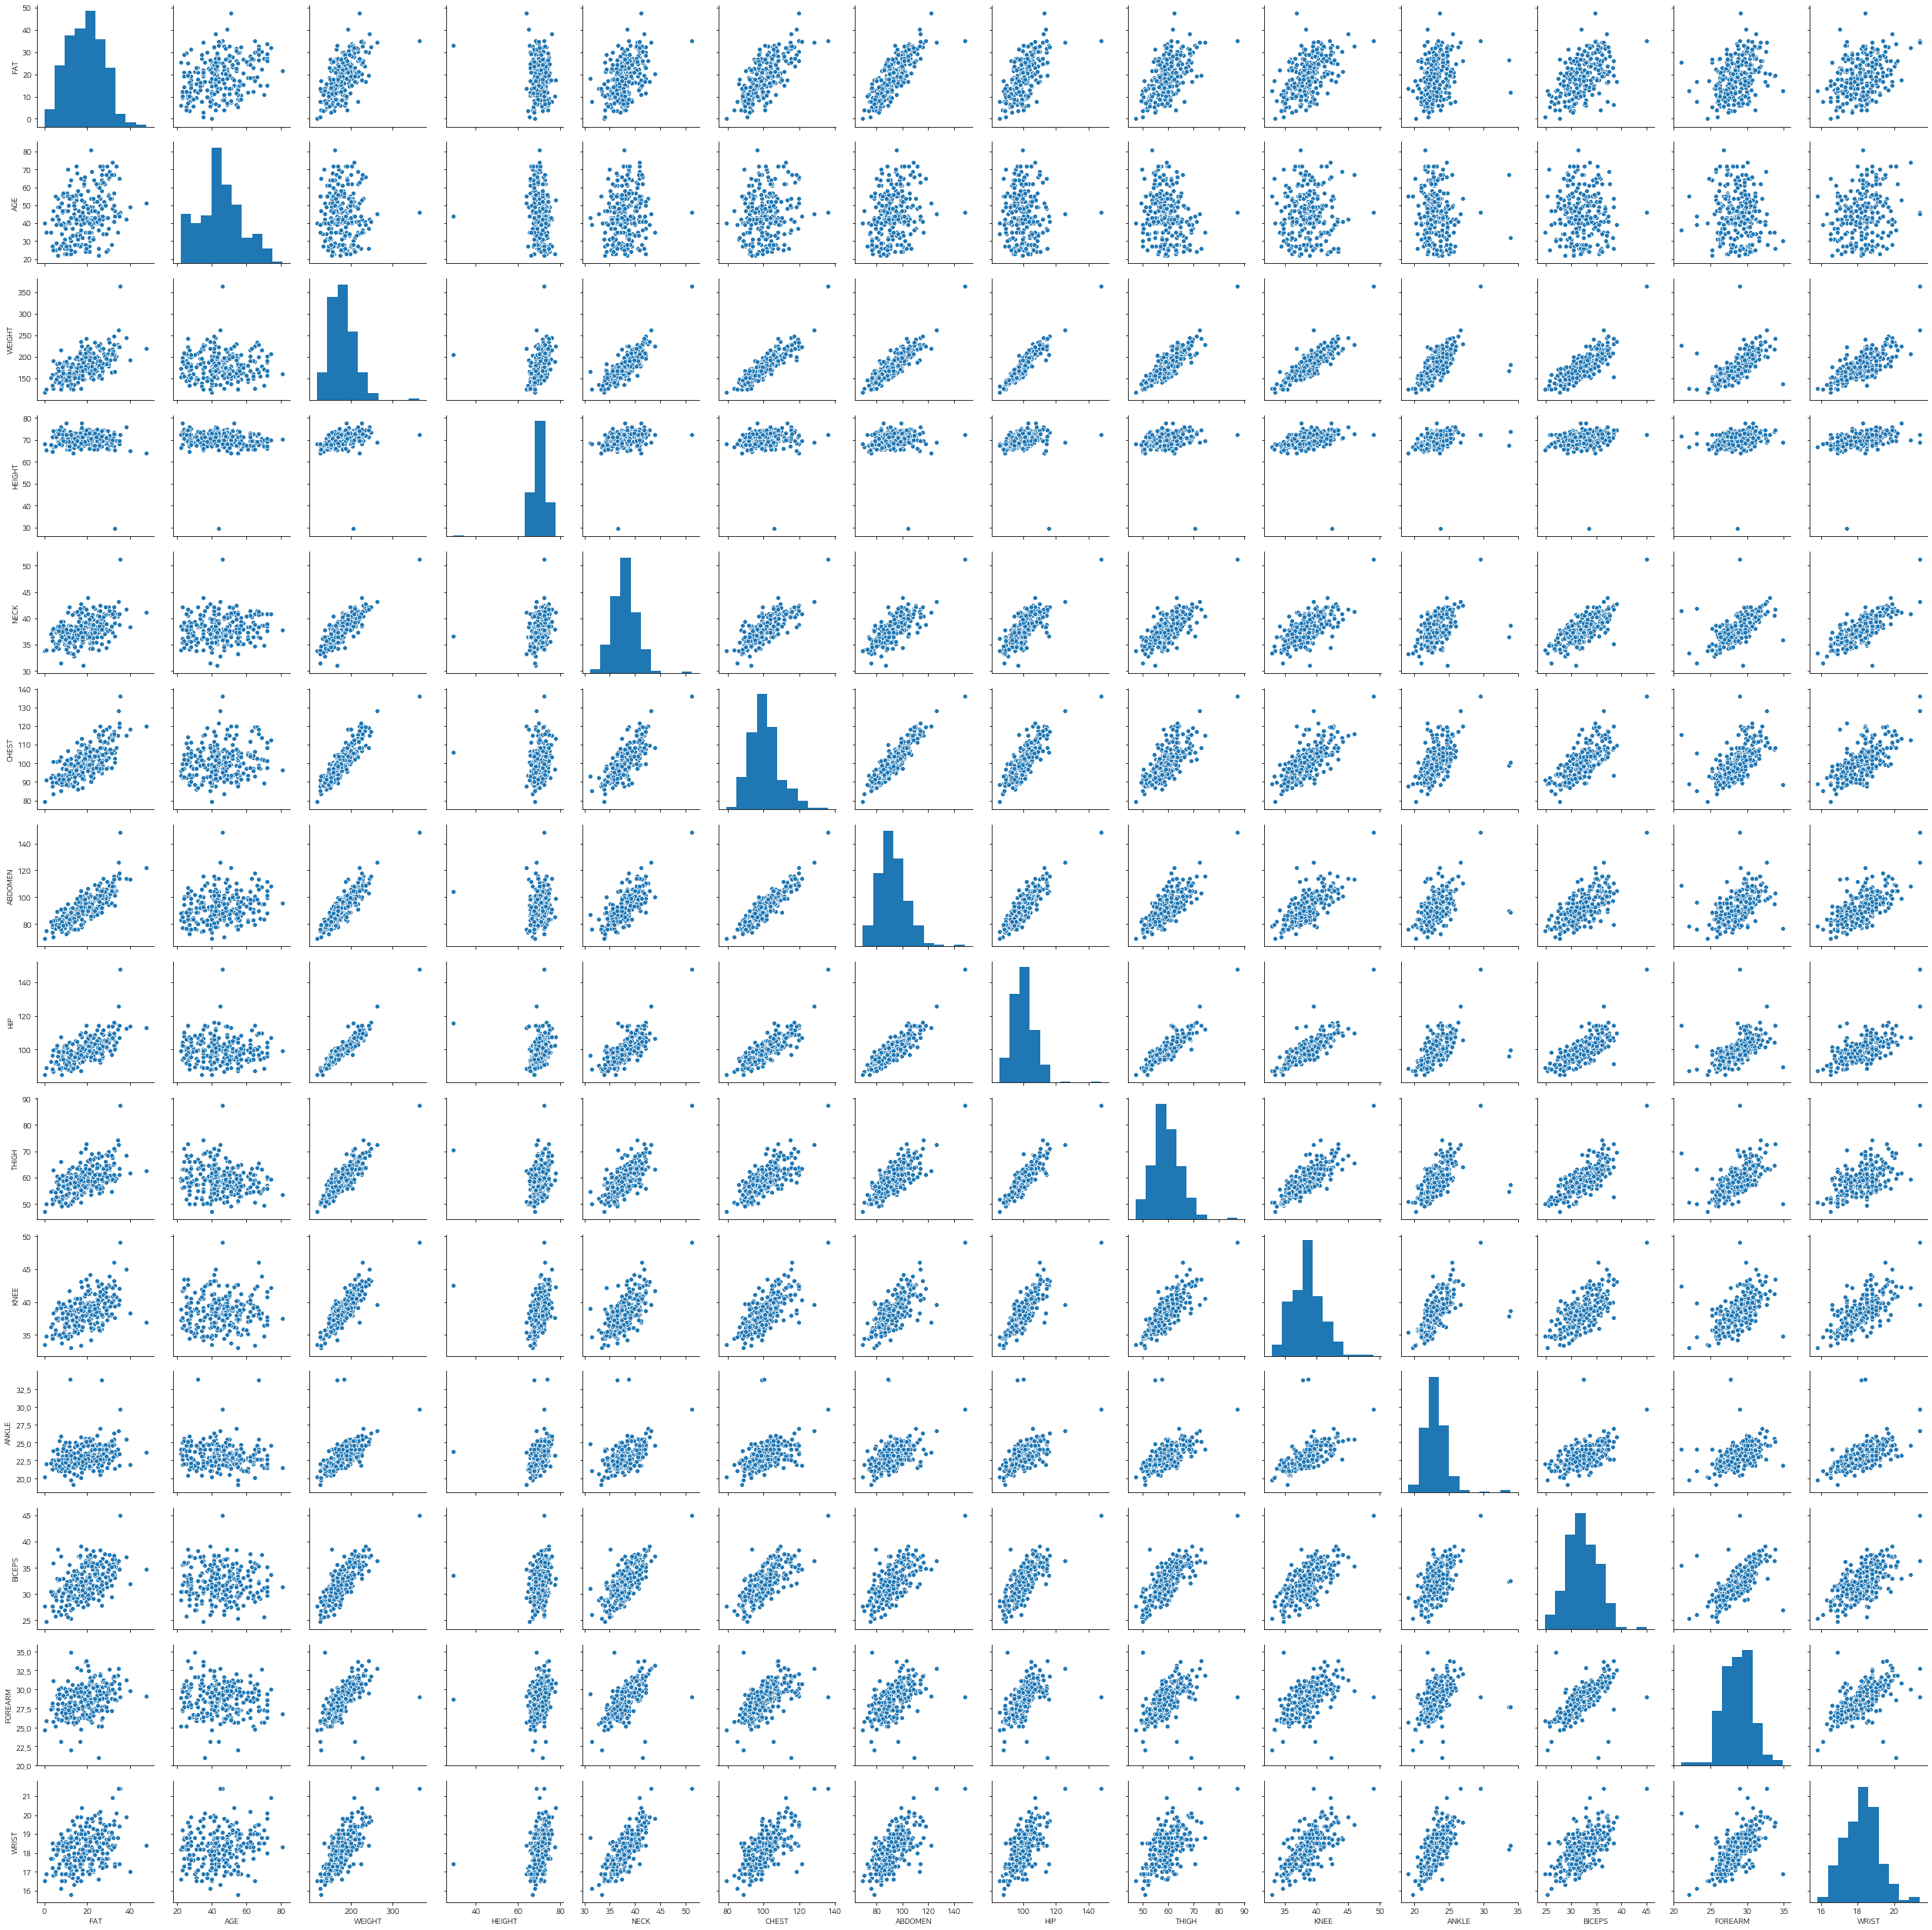

In [32]:
sns.pairplot(df_raw)

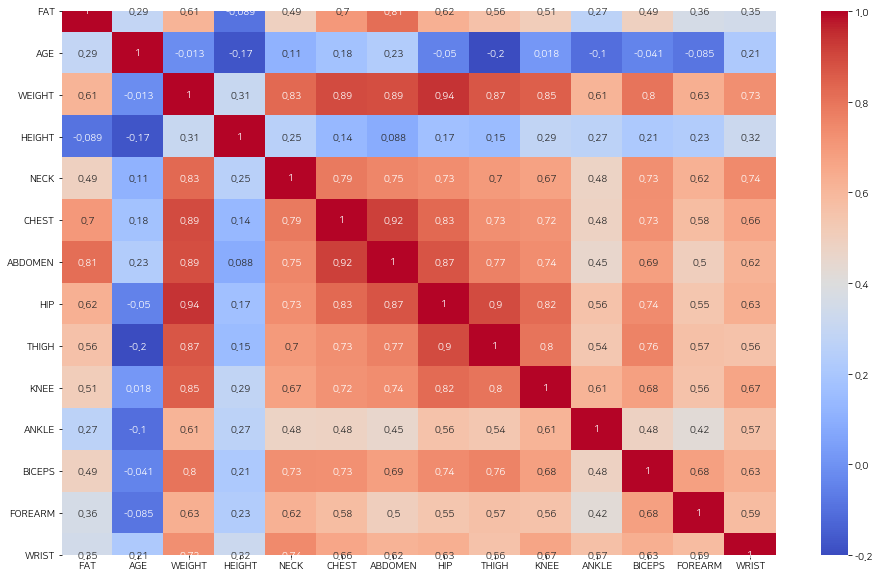

In [34]:
plt.figure(figsize = (16,10))
sns.heatmap(df_raw.corr().round(3), annot = True, cmap = 'coolwarm')
plt.show()

In [35]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_raw)

In [36]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           7.72e-64
Time:                        15:38:54   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

In [37]:
df_raw_x = df_raw.drop("FAT", axis = 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


### 위에서 다중공선성을 보면 WEIGHT가 가장 높으므로 weight를 제외하고 다시 회귀돌려야 함

In [43]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           3.75e-64
Time:                        15:53:02   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

In [44]:
df_raw_x = df_raw.drop(['FAT','WEIGHT'], axis  = 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values('VIF', inplace = True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


#### 위의 다중공선성 결과 weight변수 제거시 다중공선성 다소 개선된 것을 확인

In [47]:
# 후진제거법을 이용한 변수 선택
df_raw_y = df_raw['FAT']
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x, df_raw_y)
# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]
# rfe.support_ # True or False
# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]
print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables : Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [48]:
rfe_reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        16:04:17   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

In [49]:
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_raw_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]
df_rfe_vif.sort_values('VIF', inplace =True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


In [54]:
df_raw_x_rfe_const

,const,NECK,ABDOMEN,HIP,FOREARM,WRIST
0,1.0,51.2,148.1,147.7,29.0,21.4
1,1.0,38.1,79.1,94.5,30.0,18.8
2,1.0,38.7,95.0,98.3,25.7,18.8
3,1.0,35.2,86.4,90.1,27.3,16.9
4,1.0,41.2,122.1,112.8,29.1,18.4
...,...,...,...,...,...,...
247,1.0,40.8,108.5,107.1,30.0,20.9
248,1.0,37.4,89.7,94.2,28.8,18.8
249,1.0,36.4,92.8,99.2,26.4,16.9
250,1.0,37.4,93.0,97.0,29.7,19.0


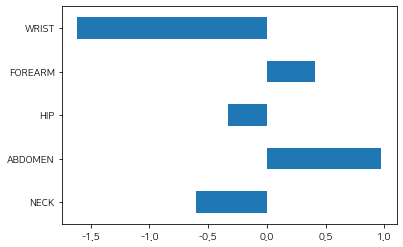

In [55]:
df_reg_coef = pd.DataFrame({"Coef" : rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

In [56]:
# 표준화 회귀곅수를 이용한 변수 중요도 확인
scaler = StandardScaler()
# Scale 변환대상 변수 : 일반적으로 설명변수
cols = df_raw_x.columns

# Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

# 목표변수 추가
df_scaled['FAT'] = df_raw['FAT']
reg_model_scaled = smf.ols(formula = "FAT  ~ NECK + ABDOMEN + HIP + FOREARM + WRIST" , data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        16:15:52   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0